In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


## Performing EDA

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df.describe() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Checking Nulls

In [5]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  4238


,Total Missing,In Percent
glucose,388,9.16
education,105,2.48
BPMeds,53,1.25
totChol,50,1.18
cigsPerDay,29,0.68
BMI,19,0.45
heartRate,1,0.02
male,0,0.00
age,0,0.00
currentSmoker,0,0.00


## Fixing nulls


In [6]:
df['glucose'].fillna(value = df['glucose'].mean().round(0), inplace=True)
df['education'].fillna(value = df['education'].mean().round(0), inplace=True)
df['BPMeds'].fillna(value = df['BPMeds'].mean().round(0), inplace=True)
df['totChol'].fillna(value = df['totChol'].mean().round(0), inplace=True)
df['cigsPerDay'].fillna(value = df['cigsPerDay'].mean().round(0), inplace=True)
df['BMI'].fillna(value = df['BMI'].mean().round(0), inplace=True)
df['heartRate'].fillna(value = df['heartRate'].mean().round(0), inplace=True)


In [7]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  4238


,Total Missing,In Percent
male,0,0.0
age,0,0.0
education,0,0.0
currentSmoker,0,0.0
cigsPerDay,0,0.0
BPMeds,0,0.0
prevalentStroke,0,0.0
prevalentHyp,0,0.0
diabetes,0,0.0
totChol,0,0.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

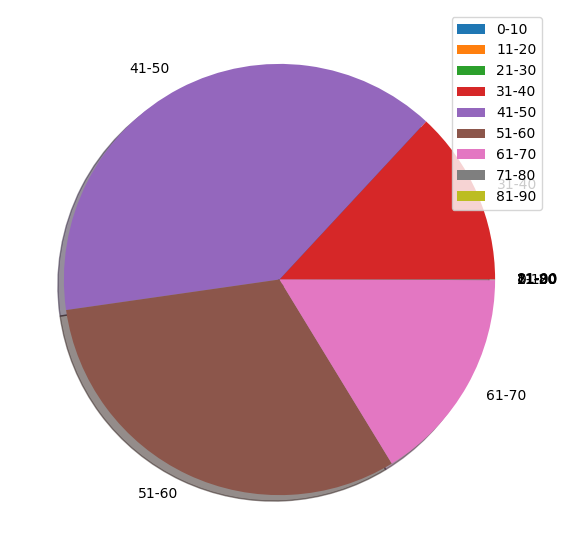

In [9]:
 agedist=df[df['age'].notnull()]['age'].values
ages=np.histogram(agedist,bins=[0,10,20,30,40,50,60,70,80,90])
ages_label=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']
plt.figure(figsize=(7, 7))
explode=[0,0,0,0,0,0,0,0,0]
plt.pie(x=ages[0], labels=ages_label,shadow=True,explode=explode)
plt.legend()
plt.show()

<AxesSubplot:>

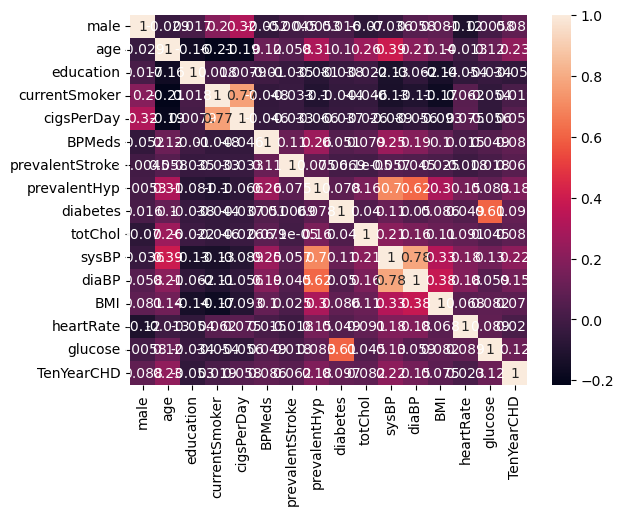

In [10]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [11]:
X=df.drop(columns=['TenYearCHD'])
Y=df.TenYearCHD
# to ensure proper split:
df.shape,X.shape,Y.shape

((4238, 16), (4238, 15), (4238,))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.20 ,random_state=42)

In [14]:
X_train.shape

(3390, 15)

In [15]:
X_test.shape,Y_train.shape,Y_test.shape

((848, 15), (3390,), (848,))

In [16]:
model=LogisticRegression()

In [17]:
lr = model.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
lr.score(X_train,Y_train)

0.8486725663716814

In [19]:
lr_accuracy=lr.score(X_test,Y_test)
print(lr_accuracy)

0.8525943396226415


## Desision Tree

In [20]:
from sklearn import tree

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [22]:
clf.score(X,Y)

1.0

[Text(0.5439799880789655, 0.9807692307692307, 'X[1] <= 48.5\ngini = 0.258\nsamples = 4238\nvalue = [3594, 644]'),
 Text(0.2569464083710407, 0.9423076923076923, 'X[14] <= 232.5\ngini = 0.147\nsamples = 2083\nvalue = [1917, 166]'),
 Text(0.21230439291101055, 0.9038461538461539, 'X[4] <= 16.5\ngini = 0.144\nsamples = 2078\nvalue = [1916, 162]'),
 Text(0.12905354449472098, 0.8653846153846154, 'X[10] <= 192.0\ngini = 0.103\nsamples = 1344\nvalue = [1271, 73]'),
 Text(0.12047511312217195, 0.8269230769230769, 'X[9] <= 398.5\ngini = 0.099\nsamples = 1338\nvalue = [1268, 70]'),
 Text(0.10935143288084465, 0.7884615384615384, 'X[1] <= 43.5\ngini = 0.097\nsamples = 1335\nvalue = [1267, 68]'),
 Text(0.09313725490196079, 0.75, 'X[11] <= 109.25\ngini = 0.067\nsamples = 807\nvalue = [779, 28]'),
 Text(0.083710407239819, 0.7115384615384616, 'X[14] <= 101.0\ngini = 0.065\nsamples = 805\nvalue = [778, 27]'),
 Text(0.07088989441930618, 0.6730769230769231, 'X[9] <= 304.5\ngini = 0.056\nsamples = 768\nvalue

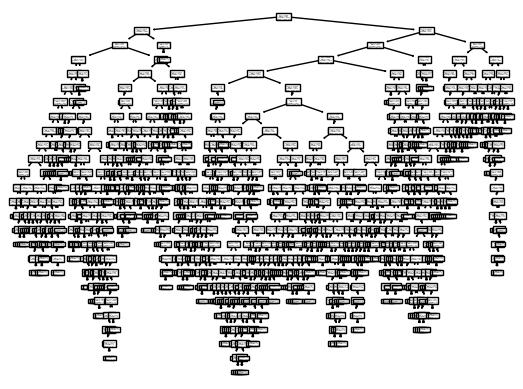

In [23]:
tree.plot_tree(clf)

In [24]:
from sklearn.tree import export_text
r = export_text(clf)
print(r)

|--- feature_1 <= 48.50
|   |--- feature_14 <= 232.50
|   |   |--- feature_4 <= 16.50
|   |   |   |--- feature_10 <= 192.00
|   |   |   |   |--- feature_9 <= 398.50
|   |   |   |   |   |--- feature_1 <= 43.50
|   |   |   |   |   |   |--- feature_11 <= 109.25
|   |   |   |   |   |   |   |--- feature_14 <= 101.00
|   |   |   |   |   |   |   |   |--- feature_9 <= 304.50
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 170.50
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 62.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_13 >  62.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- feature_10 >  170.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 192.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  192.50
|   |   |   |   |   |   |   |   | 

In [25]:
reg = tree.DecisionTreeRegressor()
reg = reg.fit(X_train,Y_train)

In [26]:
v = abs(reg.score(X_test,Y_test))
print (v)

0.8230261985385847


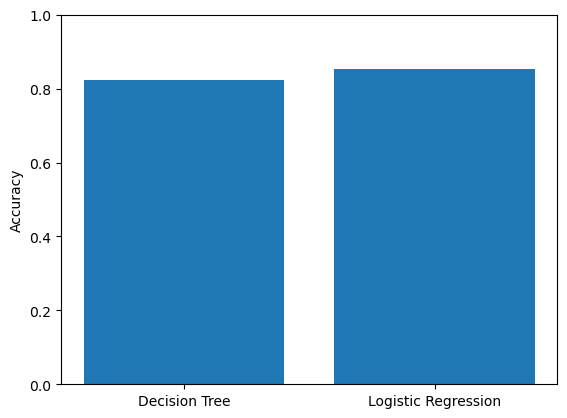

In [27]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.bar(['Decision Tree','Logistic Regression'],[v,lr_accuracy])
ax.set_ylim(0,1)
ax.set_ylabel('Accuracy')

plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier

max_depth = [2, 3, 4, 5, 6]      #maximum depth of decision tree
min_samples_split = [2, 3, 4, 5] #
min_samples_leaf = [1, 2, 3]
max_features = [None, 'sqrt', 'log2']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

results = []


for depth in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            for feat in max_features:
                for crit in criterion:
                    for spl in splitter:
                        
                        dtc = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, 
                                                     min_samples_leaf=leaf, max_features=feat,
                                                     criterion=crit, splitter=spl)
                       
                        dtc.fit(X_train, Y_train)
                        accuracy = dtc.score(X_test, Y_test)
                        
                        results.append({'max_depth': depth, 'min_samples_split': split, 
                                        'min_samples_leaf': leaf, 'max_features': feat,
                                        'criterion': crit, 'splitter': spl, 'accuracy': accuracy})
                        v=max(accuracy,v)


results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)[:10]
for i, result in enumerate(results_sorted):
    print(f"Rank {i+1}: {result}")

Rank 1: {'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'criterion': 'entropy', 'splitter': 'random', 'accuracy': 0.8584905660377359}
Rank 2: {'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None, 'criterion': 'entropy', 'splitter': 'random', 'accuracy': 0.8584905660377359}
Rank 3: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'criterion': 'gini', 'splitter': 'random', 'accuracy': 0.8584905660377359}
Rank 4: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'criterion': 'entropy', 'splitter': 'best', 'accuracy': 0.8573113207547169}
Rank 5: {'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'gini', 'splitter': 'best', 'accuracy': 0.8573113207547169}
Rank 6: {'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': None, 'criterion': 'gini', 'splitter': 'random', 'accura

## Acccuracy Comparison

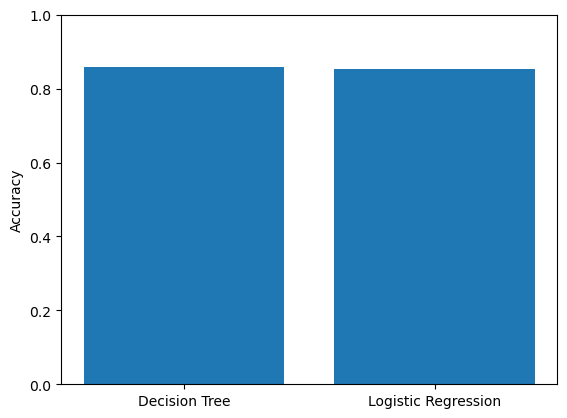

In [29]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.bar(['Decision Tree','Logistic Regression'],[v,lr_accuracy])
ax.set_ylim(0,1)
ax.set_ylabel('Accuracy')

plt.show()

In [30]:
print(v)

0.8584905660377359
